The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
   TimeFromStart TypeLogLine       GcPhase      MemoryChange  PauseDuration  \
0          0.444       info   gc             55M->10M(1040M)          4.938   
1          0.661       info   gc             74M->24M(1040M)          6.922   
2          0.881       info   gc            128M->44M(1040M)         11.086   
3          1.003       info   gc            108M->59M(1040M)          9.051   
4          1.069       info   gc             91M->66M(1040M)          8.112   
5         38.882       info   gc            122M->71M(1784M)          9.275   
6        130.545       info   gc            191M->78M(1784M)         10.349   
7        213.156       info   gc            198M->84M(1784M)          9.328   
8        393.167       info   gc            372M->87M(1784M)         11.765   

   PauseType  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7

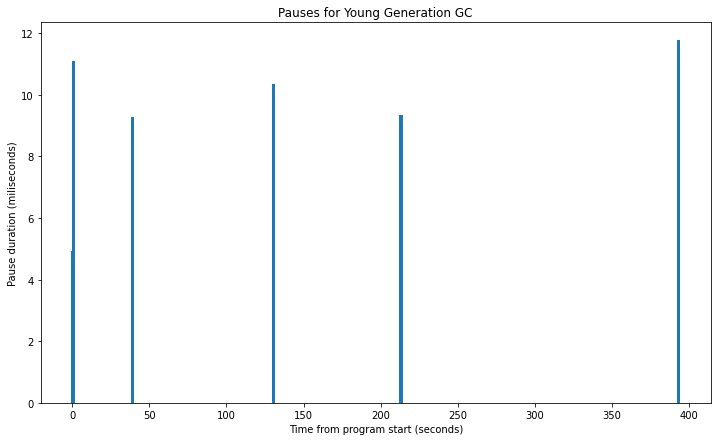

   TimeFromStart TypeLogLine       GcPhase      MemoryChange  PauseDuration  \
0          0.444       info   gc             55M->10M(1040M)          4.938   
1          0.661       info   gc             74M->24M(1040M)          6.922   
2          0.881       info   gc            128M->44M(1040M)         11.086   
3          1.003       info   gc            108M->59M(1040M)          9.051   
4          1.069       info   gc             91M->66M(1040M)          8.112   
5         38.882       info   gc            122M->71M(1784M)          9.275   
6        130.545       info   gc            191M->78M(1784M)         10.349   
7        213.156       info   gc            198M->84M(1784M)          9.328   
8        393.167       info   gc            372M->87M(1784M)         11.765   

   PauseType  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
0      0.444
1      0.661
2      0.881
3      1.003
4      

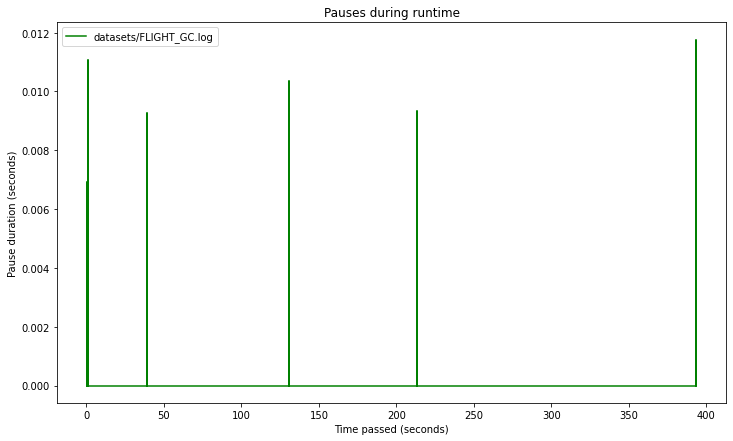

0      0.444
1      0.661
2      0.881
3      1.003
4      1.069
5     38.882
6    130.545
7    213.156
8    393.167
Name: TimeFromStart, dtype: float64
393.167
32.76391666666667
[[4.938, 6.922, 11.086, 9.051, 8.112], [9.275], [], [10.349], [], [], [9.328], [], [], [], [], [11.765]]
[0.0, 32.76391666666667, 65.52783333333333, 98.29175000000001, 131.05566666666667, 163.81958333333333, 196.58350000000002, 229.34741666666667, 262.11133333333333, 294.87525, 327.63916666666665, 360.4030833333333]
[40.109, 9.275, [], 10.349, [], [], 9.328, [], [], [], [], 11.765]


TypeError: unsupported operand type(s) for /: 'list' and 'int'

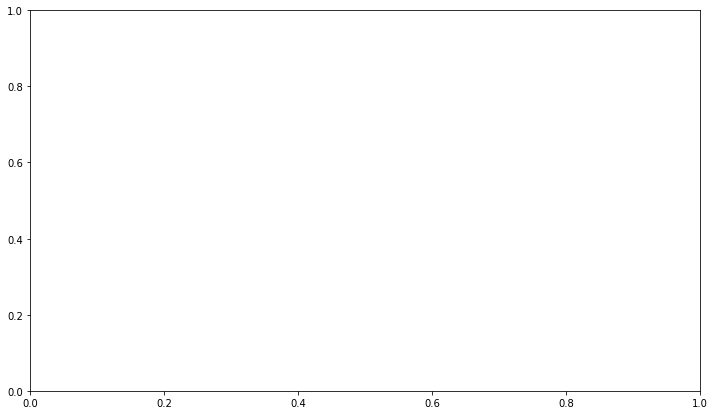

In [53]:
''' Collects information on pauses, and displays charts and metadata on pauses'''
%load_ext autoreload
%autoreload 2
from scripts import parse_log as pl
from scripts import plot_data as dplt
from scripts import compare_logs as cl
pl.setLogPath("datasets/FLIGHT_GC.log")
# Get the pauses information from file specified above
table_young_pauses = pl.getYoungPauses(create_csv = False)

if not table_young_pauses.empty:
    # plot bar graph for pauses , X = time, Y = pause_dOuration
    dplt.plot_pauses(table_young_pauses)
    
    # plot line graph for pauses, X = time, Y = time paused (Scaled)
    # NOTE: (TODO:) these files currently live in scripts/compare_logs , they should live in plot_data
    cl.setFiles([pl.getLogPath()], [str(pl.getLogPath())])
    cl.comparePauses(True, 12, 12)
    
else:
    print("No information recorded")